In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset
df = pd.read_csv('IMDb Movies India.csv.csv')

# Display the first few rows to get an overview
df.head()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 76763: invalid continuation byte

In [24]:
# Load the dataset with explicit encoding specification
df = pd.read_csv('IMDb Movies India.csv.csv', encoding='latin1')

# Display the first few rows to get an overview
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [25]:
# Display information about missing values
print("Missing Values Before Handling:")
print(df.isnull().sum())

# Fill missing numerical values with mean
df.fillna(df.mean(), inplace=True)

# Display information after handling missing values
print("\nMissing Values After Handling:")
print(df.isnull().sum())

Missing Values Before Handling:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [26]:
# Display information about missing values for numeric columns
print("Missing Values Before Handling:")
print(df.select_dtypes(include='number').isnull().sum())

# Fill missing numerical values with mean
df.fillna(df.mean(), inplace=True)

# Display information after handling missing values
print("\nMissing Values After Handling:")
print(df.select_dtypes(include='number').isnull().sum())


Missing Values Before Handling:
Rating    7590
dtype: int64


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [27]:
# Display information about missing values for numeric columns
numeric_columns = df.select_dtypes(include='number').columns
print("Missing Values Before Handling:")
print(df[numeric_columns].isnull().sum())

# Fill missing numerical values with mean
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()))

# Display information after handling missing values
print("\nMissing Values After Handling:")
print(df[numeric_columns].isnull().sum())


Missing Values Before Handling:
Rating    7590
dtype: int64

Missing Values After Handling:
Rating    0
dtype: int64


In [28]:
# Display basic statistics
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
             Rating
count  15509.000000
mean       5.841621
std        0.987343
min        1.100000
25%        5.841621
50%        5.841621
75%        6.000000
max       10.000000


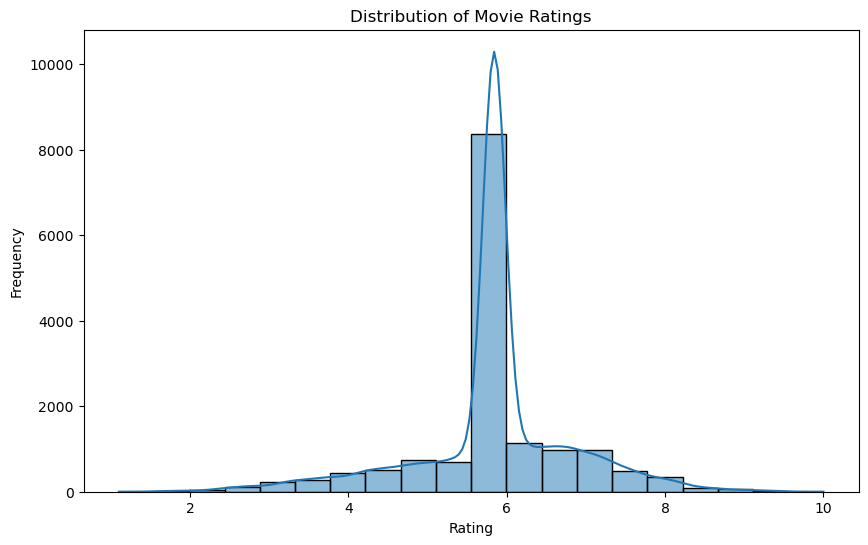

In [29]:
# Histogram of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

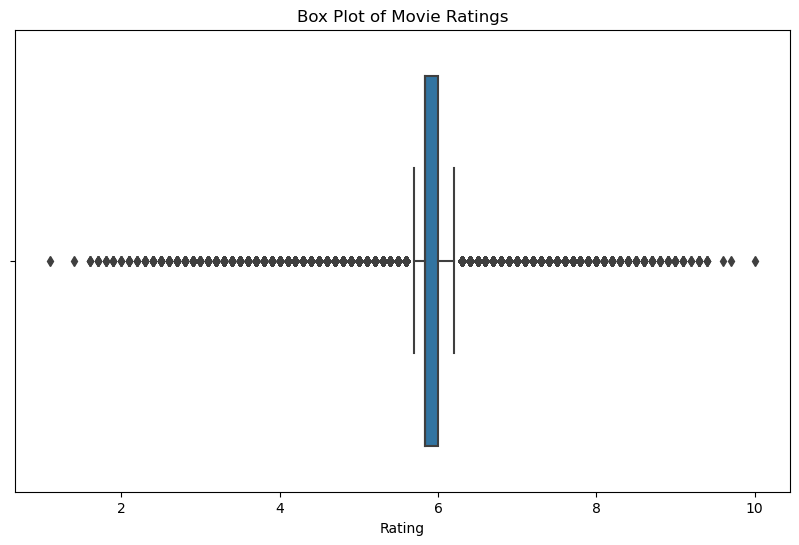

In [30]:
# Box plot of movie ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', data=df)
plt.title('Box Plot of Movie Ratings')
plt.xlabel('Rating')
plt.show()


C:\Users\BAHU Computers\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


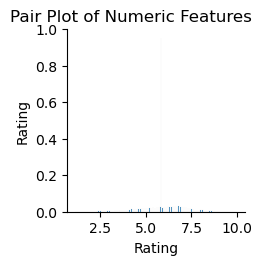

In [31]:
# Pair plot for numeric features
sns.pairplot(df.select_dtypes(include='number'))
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()


In [32]:
# Group by year and calculate the average rating for each year
average_rating_by_year = df.groupby('Year')['Rating'].mean().reset_index()

# Find the year with the highest average rating
best_rating_year = average_rating_by_year.loc[average_rating_by_year['Rating'].idxmax()]

print(f"The year with the highest average rating is {best_rating_year['Year']} with a rating of {best_rating_year['Rating']:.2f}.")


The year with the highest average rating is (1917) with a rating of 6.70.


In [33]:
# Scatter plot of Movie Length vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Length', y='Rating', data=df)
plt.title('Scatter Plot of Movie Length vs. Rating')
plt.xlabel('Movie Length')
plt.ylabel('Rating')
plt.show()

ValueError: Could not interpret value `Length` for parameter `x`

<Figure size 1000x600 with 0 Axes>

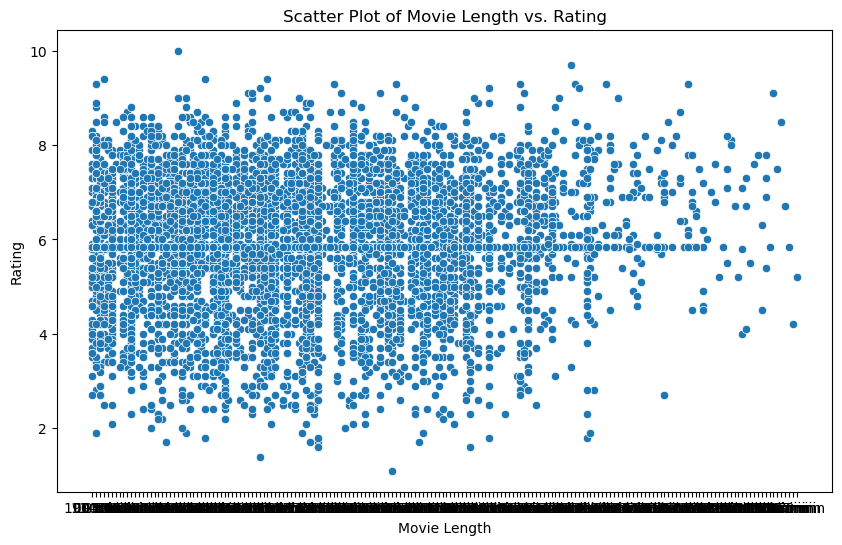

In [35]:
# Scatter plot of Movie Length vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=df)
plt.title('Scatter Plot of Movie Length vs. Rating')
plt.xlabel('Movie Length')
plt.ylabel('Rating')
plt.show()


In [38]:
# Identify the top 10 movies according to rating
top_10_movies = df.nlargest(10, 'Rating')

# Display the top 10 movies
print("Top 10 Movies According to Rating:")
print(top_10_movies[['Name', 'Year', 'Rating']])


Top 10 Movies According to Rating:
                      Name    Year  Rating
8339       Love Qubool Hai  (2020)    10.0
5410            Half Songs  (2021)     9.7
2563                 Breed  (2020)     9.6
5077          Gho Gho Rani  (2019)     9.4
6852                  June  (2021)     9.4
11704             Ram-Path  (2017)     9.4
14222  The Reluctant Crime  (2020)     9.4
1314          Ashok Vatika  (2018)     9.3
1729              Baikunth  (2021)     9.3
5125           God of gods  (2019)     9.3


In [40]:
# Set the rating threshold for popularity
rating_threshold = 8.0

# Count the number of popular movies released each year
popular_movies_by_year = df[df['Rating'] > rating_threshold].groupby('Year')['Name'].count().reset_index()

# Display the number of popular movies each year
print(f"Number of Popular Movies (Rating > {rating_threshold}) Released Each Year:")
print(popular_movies_by_year)


Number of Popular Movies (Rating > 8.0) Released Each Year:
      Year  Name
0   (1934)     1
1   (1938)     1
2   (1940)     1
3   (1943)     2
4   (1946)     1
..     ...   ...
63  (2017)    17
64  (2018)    24
65  (2019)    31
66  (2020)    21
67  (2021)    23

[68 rows x 2 columns]


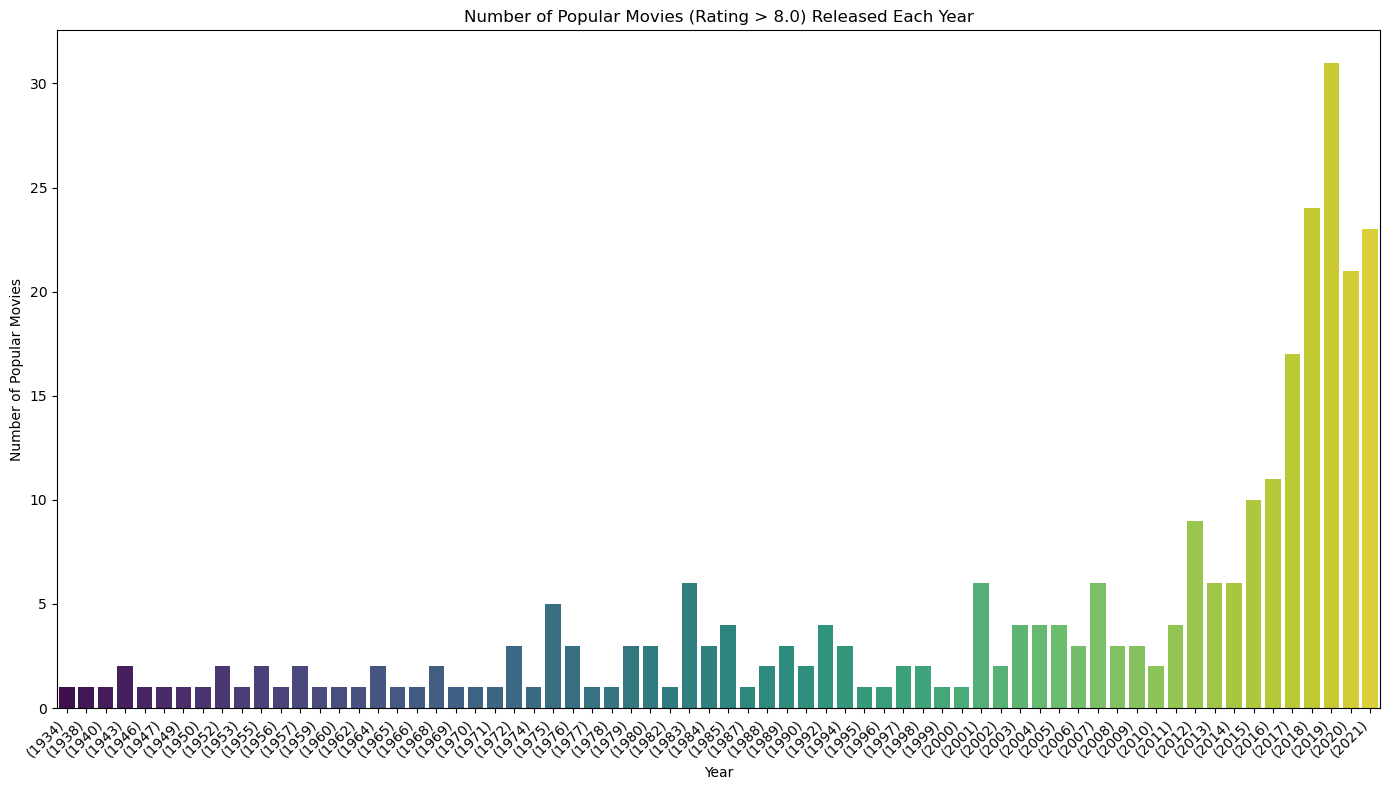

In [42]:
# Bar plot for the number of popular movies released each year
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='Name', data=popular_movies_by_year, palette='viridis')
plt.title('Number of Popular Movies (Rating > 8.0) Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Popular Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [44]:
# Identify the top-rated movie overall
top_rated_movie = df[df['Rating'] == df['Rating'].max()]

# Count the number of votes for the top-rated movie
votes_for_top_rated_movie = top_rated_movie['Votes'].values[0]

print(f"The top-rated movie overall is '{top_rated_movie['Name'].values[0]}' with a rating of {top_rated_movie['Rating'].values[0]} and {votes_for_top_rated_movie} votes.")


The top-rated movie overall is 'Love Qubool Hai' with a rating of 10.0 and 5 votes.


In [46]:
# Recreate the variable for counting votes for top-rated movies by year
votes_for_top_rated_movies_by_year = df.loc[df.groupby('Year')['Rating'].idxmax()]

# Count the number of votes for each top-rated movie by year
votes_for_top_rated_movies_by_year = votes_for_top_rated_movies_by_year.groupby('Year')['Votes'].sum().reset_index()

# Display the number of votes for top-rated movies each year
print("\nNumber of Votes for Top-Rated Movies Each Year:")
print(votes_for_top_rated_movies_by_year)



Number of Votes for Top-Rated Movies Each Year:
       Year Votes
0    (1913)     0
1    (1914)     0
2    (1915)     0
3    (1917)    22
4    (1922)     0
..      ...   ...
97   (2018)     7
98   (2019)    47
99   (2020)     5
100  (2021)     7
101  (2022)     0

[102 rows x 2 columns]


In [51]:
# Display all column names in the dataset
print("Column Names in the Dataset:")
print(df.columns)


Column Names in the Dataset:
Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'].str.extract('(\d+)'), errors='coerce')

# Create a trend analysis
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Rating', data=df)
plt.title('Trend Analysis: Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()


TypeError: arg must be a list, tuple, 1-d array, or Series

In [55]:
# Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'].str.extract('(\d+)'), errors='coerce')

# Drop rows where 'Year' is NaN
df = df.dropna(subset=['Year'])

# Create a trend analysis
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Rating', data=df)
plt.title('Trend Analysis: Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()


TypeError: arg must be a list, tuple, 1-d array, or Series

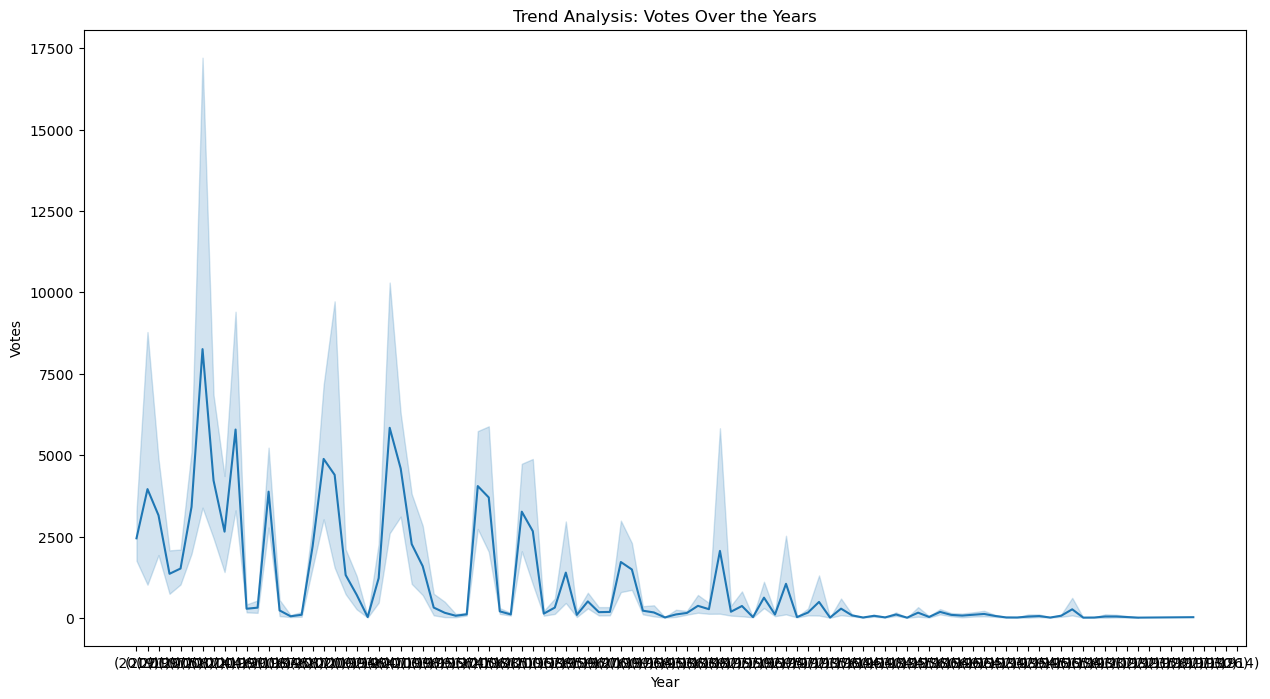

In [56]:
# Remove commas from the 'Votes' column and convert to numeric
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

# Create a trend analysis
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Votes', data=df)
plt.title('Trend Analysis: Votes Over the Years')
plt.xlabel('Year')
plt.ylabel('Votes')
plt.show()


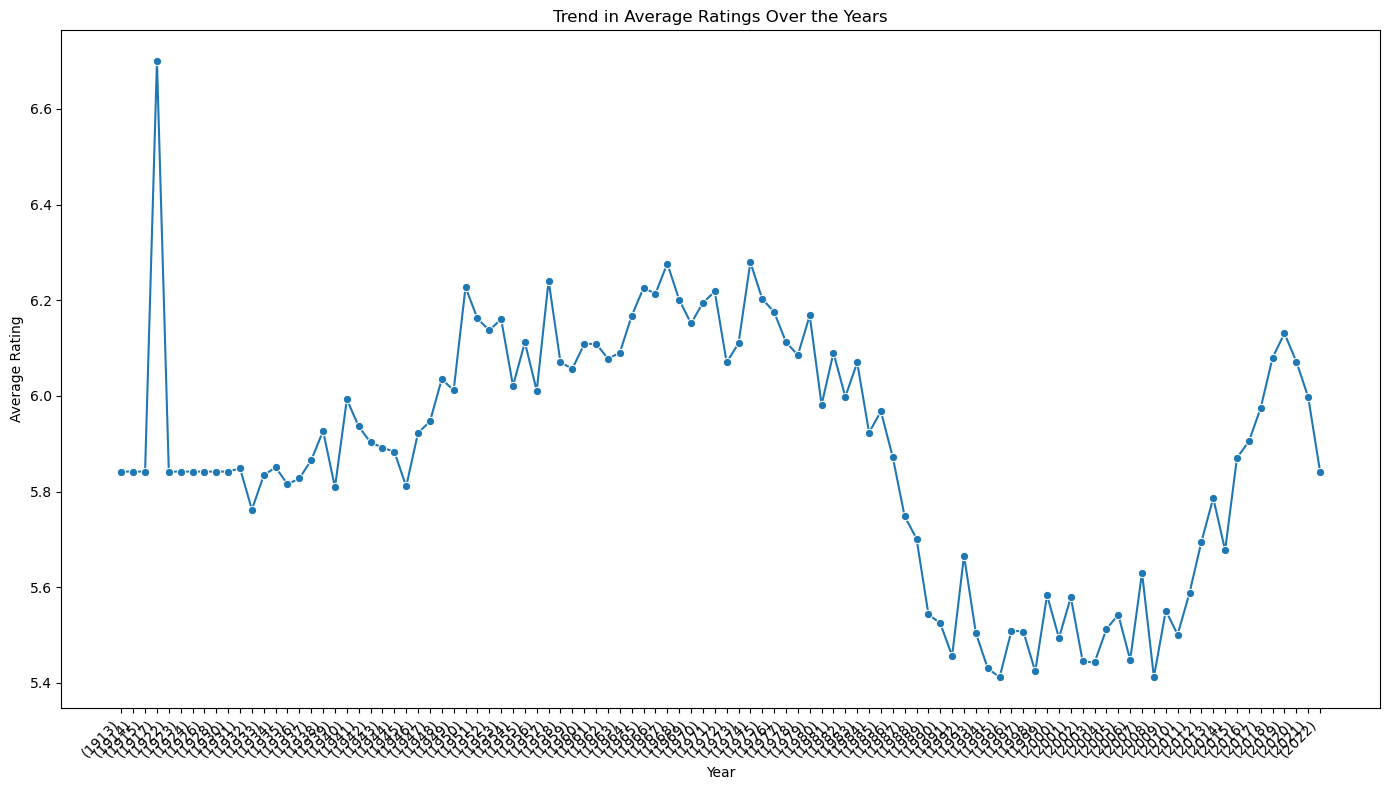

In [57]:
# Calculate the average rating for each year
average_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()

# Sort the dataframe by year
average_rating_per_year = average_rating_per_year.sort_values(by='Year')

# Plot the trend in average ratings over the years
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Rating', data=average_rating_per_year, marker='o')
plt.title('Trend in Average Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [58]:
# Identify the director who directed the most movies
most_common_director = df['Director'].value_counts().idxmax()

print(f"The director who directed the most movies is: {most_common_director}")


The director who directed the most movies is: Jayant Desai


In [59]:
# Identify the actor who starred in the most movies
most_common_actor = df['Actor'].value_counts().idxmax()

print(f"The actor who starred in the most movies is: {most_common_actor}")


KeyError: 'Actor'

In [61]:
# Identify the actor who starred in the most movies
all_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
most_common_actor = all_actors.value_counts().idxmax()

print(f"The actor who starred in the most movies is: {most_common_actor}")


The actor who starred in the most movies is: Mithun Chakraborty


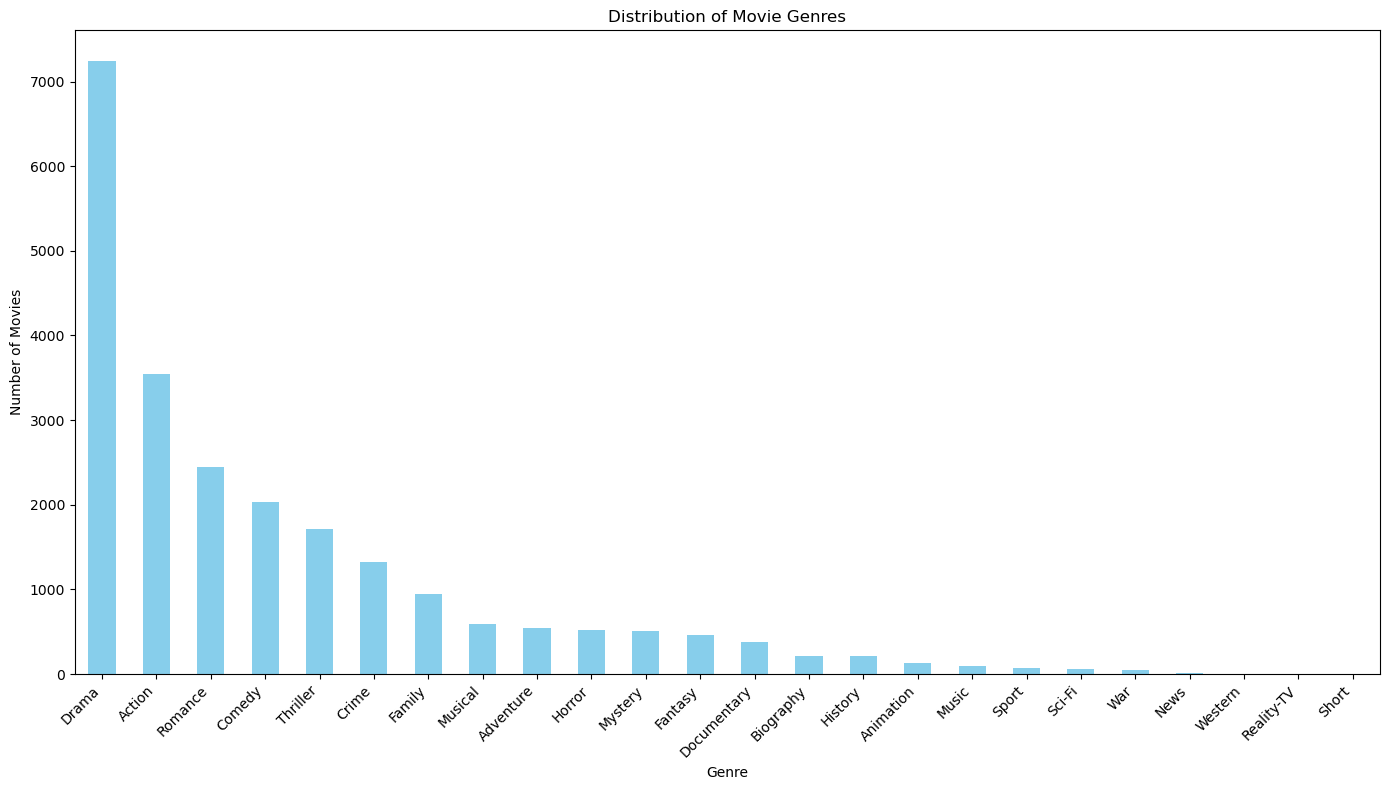

In [62]:
# Count the occurrences of each genre
genre_counts = df['Genre'].str.split(', ', expand=True).stack().value_counts()

# Plot the distribution of genres
plt.figure(figsize=(14, 8))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


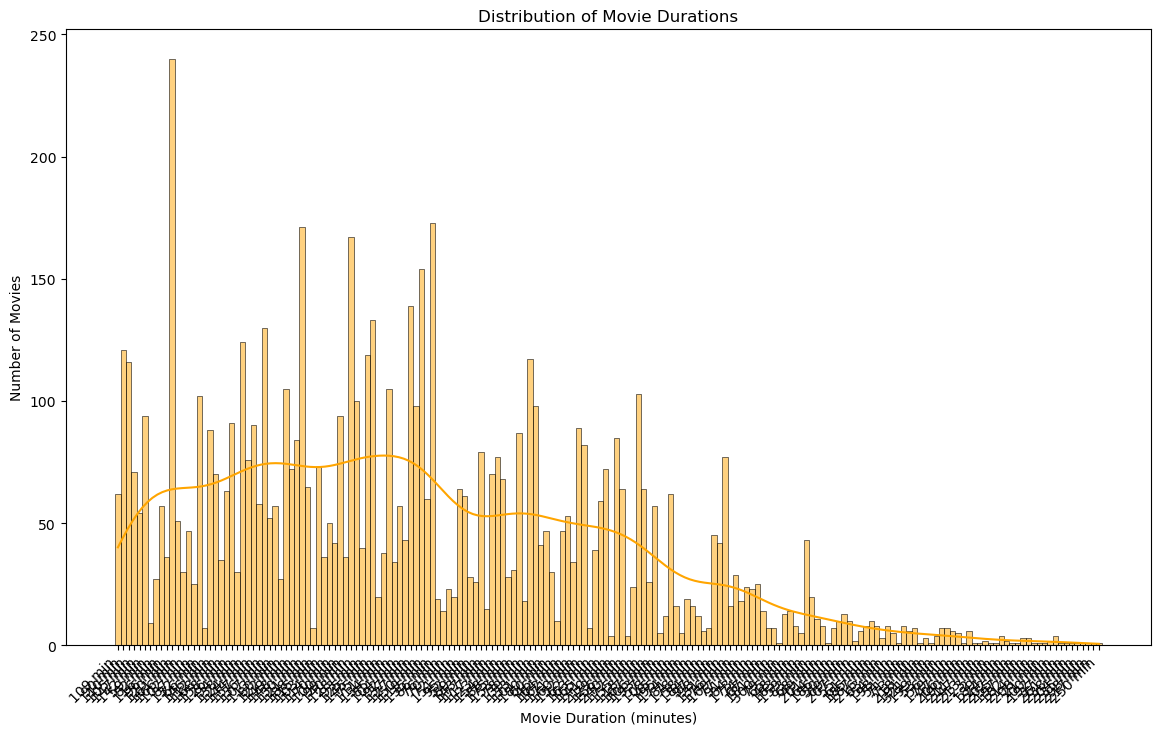

In [67]:
# Plot a histogram of movie durations with rotated x-axis labels
plt.figure(figsize=(14, 8))
sns.histplot(df['Duration'], bins=20, kde=True, color='orange')
plt.title('Distribution of Movie Durations')
plt.xlabel('Movie Duration (minutes)')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()
